# Описание проекта

Авиакомпания изучает предпочтения пользователей, покупающих билеты на разные направления. Необходимо проанализировать спрос на рейсы в города, где проходят крупнейшие культурные фестивали.

Необходимо проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

# 1. Предобработка данных

## Функции

In [1]:
# The function displays the first five strings and general info of the dataframe

def data_view(df):
    d(df.head())
    d(df.info())

## Ознакомление с данными

Настроим среду.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

from IPython.display import display as d
import warnings

In [3]:
sns.set()
warnings.filterwarnings('ignore')

Загрузим данные из файлов.

In [4]:
crafts = pd.read_csv('query_1.csv')
ports  = pd.read_csv('query_3.csv')
fests  = pd.read_csv('query_last.csv')

Ознакомимся с данными.

In [5]:
data_view(crafts)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

In [6]:
data_view(ports)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [7]:
data_view(fests)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

Наборы данных имеют малые размеры, что упрощает предобработку: данные видны "целиком". В таблице *fests* имеются пропуски.

Приступим непосредственно к предобработке.

## Предобработка

На этапе предобработки проверим данные на наличие дубликатов, выбросов, аномалий, ошибок. А также обработаем пропуски.

### Таблица *crafts*

Таблица *crafts* состоит всего из 8 строк. Выведем её полностью.

In [8]:
crafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Никаких проблем нет - всё чисто.

Можно отметить, что самолёты некоторых моделей выполняют рейсы чаще других в несколько раз. Это - небольшие и средние самолёты. А огромный *Boeing 777-300* выполнил наименьшее количество рейсов: на внутренних рейсах применение подобных самолётов не всегда целесообразно.

### Таблица *ports*

Выведем первые три строки таблицы *ports*.

In [9]:
ports.head(3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


#### Дубликаты, пропуски

Проверим данные на наличие дубликатов. Проверка по значениям столбца *city* будет точнее, чем по полным строкам.

In [10]:
ports.city.duplicated().sum()

0

Проверим данные на наличие пропусков.

In [11]:
ports.isna().sum()

city               0
average_flights    0
dtype: int64

#### Выбросы, аномалии, ошибки

Проверим данные на наличие выбросов, аномалий, ошибок.

##### Столбец city

Так как размер таблицы составляет всего 101 строку, целесообразно вычитать список городов "вручную".

In [12]:
ports.city.unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

В названиях городов ошибок нет.

##### Столбец average_flights

In [13]:
ports.average_flights.describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

In [14]:
ports.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [15]:
ports.sort_values(by='average_flights', ascending=False).tail(10)

,city,average_flights
76,Стрежевой,1.0
1,Анадырь,1.0
9,Братск,1.0
8,Благовещенск,1.0
21,Иваново,1.0
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0
49,Нефтеюганск,1.0


Выбросов или аномалий нет.

Рейтинг выглядит вполне закономерно. Первые три места заняли столицы: Москва, Санкт-Петербург и Новосибирск - столица Сибири. За ними - другие крупные города.

В конце списка - маленькие северные города, "соседствущие" с административными центрами целых регионов. Столь разные по статусу населённые пункты имеют общие черты: сравнительно небольшая численность населения, почти полное отсутствие туризма, низкое присутствие бизнеса федерального уровня (который как раз сосредоточен преимущественно в городах из топа этого списка).

### Таблица *fests*

Таблица *fests* состоит всего из 10 строк. Выведем её полностью.

In [16]:
fests

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


#### Дубликаты, пропуски

Дубликатов нет. Пропуски означают, что в течение соответствующих им недель фестивали не проводились.

Столбец *festival_week* - лишний, так как в нём дублируется информация, содержащаяся в столбцах *week_number* (информация о номере недели) и *festival_name* (информация о наличии или отсутствии фестиваля). Столбец *festival_week* следует удалить.

Столбец *festival_name* содержит названия фестивалей - строки. Либо - пропуски, если фестиваль не проводился. Поскольку названия фестивалей в данном исследовании не важны, целесообразно перейти к бинарным значениям: "1" - фестиваль проводился, "0" - фестиваль не проводился.

Выполним преобразования.

In [17]:
fests.drop(columns=['festival_week'], inplace=True)
fests = fests.rename(columns={'festival_name': 'festival'})
fests.fillna(0, inplace=True)
fests.festival.where(fests.festival==0, 1, inplace=True)
fests.festival = fests.festival.astype('int')

In [18]:
data_view(fests)

,week_number,ticket_amount,festival
0,30,43568,1
1,31,51034,1
2,32,51675,0
3,33,51378,0
4,34,51492,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival         10 non-null int32
dtypes: int32(1), int64(2)
memory usage: 328.0 bytes


None

#### Выбросы, аномалии, ошибки

В данных имеется аномалия: количество билетов *ticket_amount* за неделю №30 значительно отличается от остальных значений столбца.

Вот статистика без учёта этой аномалии.

In [19]:
ticket_amount_stats = fests.ticket_amount.drop([0]).describe()
d(ticket_amount_stats)

ticket_amount_stats['std'] / ticket_amount_stats['50%']

count        9.000000
mean     51459.555556
std        201.542868
min      51034.000000
25%      51378.000000
50%      51492.000000
75%      51623.000000
max      51675.000000
Name: ticket_amount, dtype: float64

0.0039140617637239946

Стандартное отклонение составляет менее 0.4% от медианы.

А вот различие между медианой, исключая аномалию, и аномалией.

In [20]:
(ticket_amount_stats['50%'] - fests.ticket_amount[0]) / ticket_amount_stats['50%']

0.15388798259923872

Различие составляет более 15%. Сама неделя при этом ничем не примечательна: конец июля - это не новогодние праздники.

Имеются основания не доверять данным в этой строке. Несмотря на то, что данные были извлечены из БД корректно, не исключена ошибка в самих данных. Необходимо сообщить о проблеме архитектору БД.

Удалим проблемную строку.

In [21]:
fests.drop([0], inplace=True)
fests.reset_index(drop=True, inplace=True)
fests

,week_number,ticket_amount,festival
0,31,51034,1
1,32,51675,0
2,33,51378,0
3,34,51492,0
4,35,51360,0
5,36,51386,1
6,37,51670,0
7,38,51518,0
8,39,51623,0


## Вывод по предобработке данных

Данные содержатся в трёх таблицах. Две из них - *crafts* и *fests* -  имеют столь **малый** размер (всего несколько строк), что имеется возможность обработать их **вручную**: видна вся таблица целиком. Таблица *ports* - побольше: порядка ста строк. Это тоже не много, и кое-что тоже можно сделать вручную: например, проверить корректность названий городов, просто вычитав весь список.

Пропусков в данных нет: пропуски в таблице *fests* на самом деле не являются таковыми, а **интерпретируются** как "фестиваль не проводился".

В таблице *fests* удалён столбец *festival_week*, дублировавший информацию из других столбцов. Столбец *festival_name* (строковый тип данных - названия фестивалей) преобразован в *festival* (целые числа "1" и "0" - факт проведения или непроведения фестиваля). При проверке **гипотез** информация о фестивалях потребуется именно в таком виде.

В таблице *fests* выявлена **аномалия**: слишком сильно отличается от остальных количество купленных билетов *ticket_amount* за одну из недель (неделя №30). Различие составляет 15%, а среднеквадратическое отклонение без учёта этой аномалии - 0.4%. Рационального объяснения этому нет. Нет оснований доверять аномальному значению. Проблемная строка удалена.

Данные готовы для проведения исследовательского анализа.

# 2. Исследовательский анализ

##  Топ-10 городов по количеству прибывающих рейсов

Выведем рейтинг топ-10 городов по количеству прибывающих рейсов.

In [22]:
average_flights_top_10 = ports.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True)
average_flights_top_10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Как уже было отмечено выше, на вершине рейтинга закономерно находятся Москва и Санкт-Петербург. Далее идут крупнейшие города России (крупнейшие не только по численности населения, но и по уровню развития бизнеса): Новосибирск, Красноярск, Екатеринбург, Ростов и другие.

Первые три позиции лидируют со значительным отрывом.

Визуализируем рейтинг топ-10.

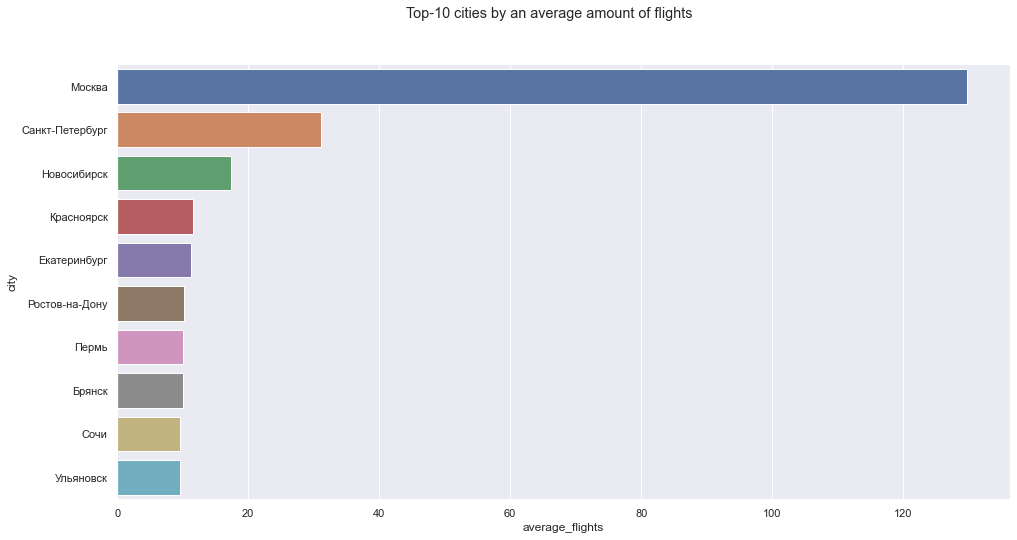

In [23]:
plt.figure(figsize=(16, 8))
plt.suptitle('Top-10 cities by an average amount of flights')

sns.barplot(x=average_flights_top_10.average_flights,
            y=average_flights_top_10.city)

plt.show()

Москву всё-таки стоит отметить отдельно. Москва - это столица и огромный мегаполис (один из крупнейших в мире). Исторически сложилась высокая централизация: бизнес тяготеет размещаться именно в Москве (как базируясь там изначально, так и перемещаясь туда из регионов по мере своего развития). Население также мигрирует в Москву из регионов с целью трудоустройства.

Большая численность населения, высокий уровень развития бизнеса - всё это отражается на потребности в авиаперевозках. О высокой потребности можно судить и по количеству аэропортов: в Москве их - четыре, в то время как в большинстве остальных городов России - по одному.

Можно отметить следующие два момента.
* Количество рейсов, прибывающих в Москву, - примерно в 4 раза больше, чем в Санкт-Петербург (второе место в рейтинге). Это как раз соотносится с количеством аэропортов.
* Количество рейсов коррелирует с численностью населения городов (регионов): население Москвы - на порядок больше, чем население других российских городов-миллионников. Петербург - где-то посередине.

## Модели самолётов и количество рейсов

Рассчитаем долю каждой модели самолёта в общем числе рейсов компании.

In [24]:
crafts_sorted = crafts.sort_values(by='flights_amount', ascending=False)

crafts_sorted['fraction'] = crafts_sorted['flights_amount'] / crafts_sorted.flights_amount.sum()
crafts_sorted

,model,flights_amount,fraction
6,Cessna 208 Caravan,4557,0.279828
5,Bombardier CRJ-200,4446,0.273012
7,Sukhoi SuperJet-100,4185,0.256985
1,Airbus A321-200,960,0.058950
2,Boeing 737-300,630,0.038686
0,Airbus A319-100,607,0.037274
3,Boeing 767-300,600,0.036844
4,Boeing 777-300,300,0.018422


Суммарная доля рейсов самолётов *Boeing* и *Airbus*.

In [25]:
crafts_sorted.tail(-3).fraction.sum()

0.19017500767577522

Покажем на диаграмме, сколько рейсов было выполнено на каждой модели самолёта.

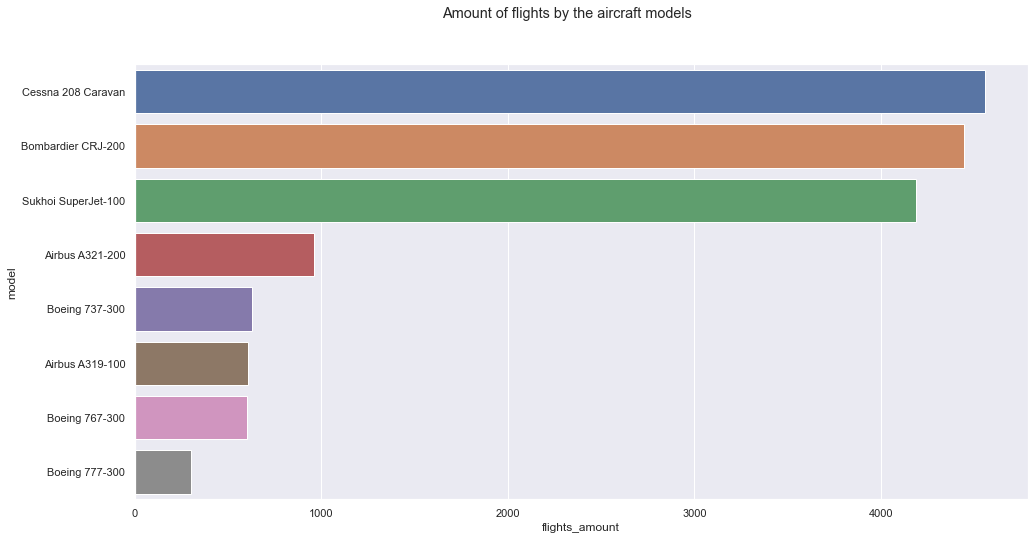

In [26]:
plt.figure(figsize=(16, 8))
plt.suptitle('Amount of flights by the aircraft models')

sns.barplot(x=crafts_sorted.flights_amount,
            y=crafts_sorted.model)

plt.show()

Наибольшее количество рейсов было выполнено на ближнемагистральном *Cessna 208 Caravan* (28%) - маленьком лёгком одномоторном самолёте вместимостью около 20 пассажиров. Почти столько же рейсов было выполнено на *Bombardier CRJ-200* (27%) - тоже ближнемагистральном, но с вдвое большей вместимостью.

Было немного неожиданно увидеть эти самолёты в числе самых массовых, но объяснение этому факту - вполне простое: на Севере подобные воздушные суда используются вместо автобусов. Перемещение наземными видами транспорта там зачастую нецелесообразно или вовсе невозможно. Самолёты там иногда летают даже между посёлками городского типа. *Cessna 208 Caravan* - то, что нужно в подобной ситуации: этот самолёт может садиться даже на грунтовую полосу. *Bombardier CRJ-200* - хоть и небольшой, но уже вполне "обычный" пассажирский самолёт. Между деревнями на нём не слетаешь, а вот перелёты на несколько сотен километров между небольшими городами (когда даже самолёты вроде *Boeing 737-300* избыточны) - самое то, для чего он подходит. Он активно эксплуатируется и в европейской части России.

На третьем месте - отечественный *Sukhoi SuperJet-100* (26%). Этот самолёт - уже среднемагистральный, вместимостью около 100 пассажиров. Популярен у отечественных перевозчиков, за ним - большая доля рынка.

Самолёты *Boeing* и *Airbus* (каждая модель) выполнили рейсов в 4-5 раз меньше, чем каждый из описанных выше самолётов (2...6%). Суммарно же они выполнили рейсов сопоставимо с *Sukhoi SuperJet-100* (19%) - см. диаграмму ниже.

Меньше всех летал *Boeing 777-300* (2%). Он слишком большой для внутрироссийских рейсов и поэтому используется весьма ограниченно.

Построим круговые диаграммы, чтобы нагляднее представить долю каждой модели самолёта в общем числе рейсов. Одну диаграмму построим по всем моделям, а другую - без маленьких самолётов (*Cessna 208 Caravan* и *Bombardier CRJ-200*): они работают в обособленной нише. Сравним только модели, являющиеся друг другу прямыми конкурентами.

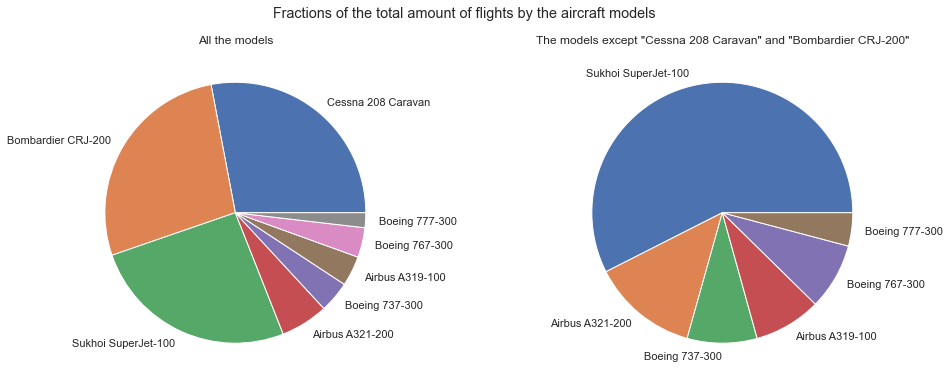

In [27]:
plt.figure(figsize=(16, 6))
plt.suptitle('Fractions of the total amount of flights by the aircraft models')

plt.subplot(121)
plt.title('All the models')
plt.pie(x=crafts_sorted.flights_amount,
        labels=crafts_sorted.model)

plt.subplot(122)
plt.title('The models except "Cessna 208 Caravan" and "Bombardier CRJ-200"')
plt.pie(x=crafts_sorted.tail(-2).flights_amount,
        labels=crafts_sorted.tail(-2).model)

plt.show()

## Города и количество рейсов

Покажем на диаграмме среднее количество рейсов, ежедневно прибывающих в каждый город. Для большей наглядности (с точки зрения масштаба диаграммы) исключим несколько первых позиций (с наибольшим количеством рейсов). Это допустимо, поскольку города из топ-10 уже были подробно рассмотрены выше.

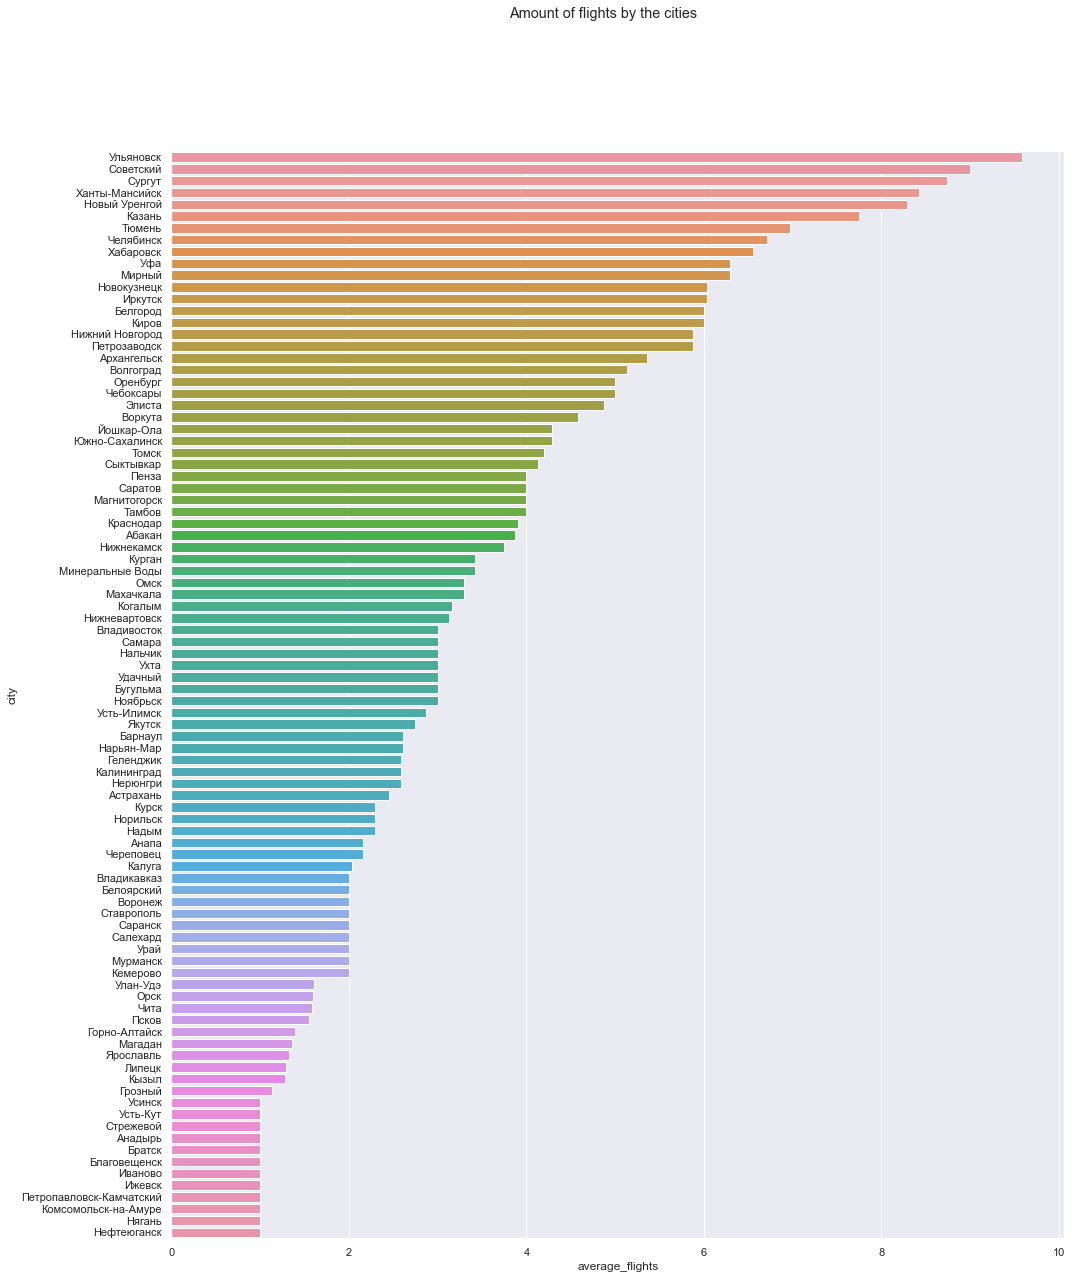

In [28]:
ports_sorted = ports.sort_values(by='average_flights', ascending=False).tail(-9)

plt.figure(figsize=(16, 20))
plt.suptitle('Amount of flights by the cities')

sns.barplot(x=ports_sorted.average_flights,
            y=ports_sorted.city)

plt.show()

Единственная тенденция, которую здесь можно проследить, - города-милионники сосредоточены в первой половине списка.

По остальным критериям города распределены довольно равномерно. И административные центры регионов, и малые "нефтегазовые" города есть как в начале, так и в конце рейтинга. Отсутствует и связь с численностью неселения, которая среди городов топ-10 вполне прослеживалась.

Вместе с тем, очень важно отметить, что количество выполненных рейсов ещё не говорит об объёме перевозок (в т.ч. пассажирских): где-то преимущественно летают боинги, а где-то - цессны. К сожалению, мы сейчас не располагаем данными о том, сколько рейсов выполнено каждой моделью самолёта в разрезе городов, поэтому исследовать детально данный вопрос не получится.

## Вывод по исследовательскому анализу

Сформирован **топ-10** городов по количеству прибывающих рейсов. **Лидеры** рейтинга: Москва, Санкт-Петербург, Новосибирск. Далее следуют другие города с большой численностью населения и высоким уровнем развития бизнеса. В этой группе городов прослеживается **положительная связь** между количеством рейсов и численностью населения.

**Москва** стоит особняком: четыре аэропорта (вместо одного, как в большинстве других российских городов) и вчетверо большее количество рейсов (по сравнению с идущим за ней в рейтинге Санкт-Петербургом; разрыв с другими регионами - ещё больше). Это соотносится с **численностью населения** Москвы (на порядок больше, чем в большинстве других крупных городов) и с уровнем её **экономического развития** (бизнес тяготеет к столице).

Исследовано количество выполненных рейсов в разрезе **моделей** самолётов. Наибольшее количество рейсов выполнили ***Cessna 208 Caravan***, ***Bombardier CRJ-200*** и ***Sukhoi SuperJet-100***. Различные модели *Boeing* и *Airbus* следуют за ними с четырёх-пятикратным отрывом, при этом между собой почти не различаясь по количеству рейсов.

Самолёт ***Cessna 208 Caravan*** эксплуатируется в том числе на Севере и замещает собой **наземный** транспорт (так как у последнего имеются серьёзные эксплуатационные ограничения в той местности). Это могут быть совсем короткие перелёты. За один рейс перевозится **мало** людей и грузов, но количество таких рейсов - весьма **большое**.

***Bombardier CRJ-200*** подходит для перелётов, где среднемагистральные самолёты - **избыточны**. Такие задачи есть как на Севере, так и в европейской части России. Региональные перелёты популярны у пассажиров, так как позволяют **сэкономить** время (не надо лететь через Москву) и деньги (существует госпрограмма регионального субсидирования перевозок, позволяющая держать цены на билеты низкими).

Отечественный ***Sukhoi SuperJet-100*** занял нишу **среднемагистральных** перевозок. У него есть импортные аналоги, но сложилось таким образом, что в своём классе именно он стал самым популярным у российских перевозчиков. В авиакомпании *F9* он выполняет около **четверти** всех рейсов и около половины рейсов в своём классе. Хотя, здесь корректнее будет говорить не столько о классе самолёта, сколько о маршрутах, на которых он используется: мы сравниваем *Sukhoi SuperJet-100* с "Боингами" и "Эйрбасами", следующими за ним в рейтинге, потому, что эти самолёты работают на одних и тех же маршрутах. Но пассажировместимость у *Sukhoi SuperJet-100* меньше, чем у них: около 100 пассажиров против 150-200 (и более). Зачастую такой вместимости бывает достаточно: большой самолёт летал бы **полупустым**, что **невыгодно**.

Остальные самолёты (различные модели ***Boeing*** и ***Airbus***) суммарно выполнили количество рейсов, **сопоставимое** с *Sukhoi SuperJet-100*.

Исследовано количество рейсов в города, **не входящие** в топ-10. Составлен рейтинг. Города-миллионники сосредоточились его в **верхней** половине (выше медианы). По остальным критериям города распределились **равномерно**: административные центры субъектов Федерации с населением в несколько сотен тысяч и более-менее развитым бизнесом идут вперемешку с небольшими северными городками (например, Белоярский и Воронеж). **Отсутствует** и **связь** с численностью населения, выявленная среди городов из топ-10.

Необходимо отметить, что **количество** рейсов не даёт полной информации об **объёме** перевозок (числе перевезённых пассажиров и массе грузов): самолёты различаются по пассажировместимости **в несколько раз** (а, к примеру, *Cessna 208 Caravan* и *Boeing 777-300* - более чем на порядок). Для исследования этого вопроса нужны дополнительные данные.

Об авиакомпании *F9* на основании выполненного анализа можно сказать, что она занимает **весьма заметное** место среди российских перевозчиков. Это видно и по количеству выполненных рейсов (особенно в сравнении с общим числом рейсов в рассматриваемые города на основании данных из открытых источников), и по составу парка самолётов. Помимо того, что компания ведёт деятельность **на большей части** территории России - это видно из списка городов, - можно сделать вывод о том, что эти города ещё и **связаны** между собой маршрутами в самых **различных** комбинациях: можно летать как по Северу на "Цессне" (вместо езды на автобусе, которого нет), так и из одного конца страны в другой на "Боинге-777" - одном из самых больших пассажирских самолётов в мире.

# 3. Проверка гипотезы

## Функции

In [31]:
# alpha - p-value threshold

alpha = 0.05

In [32]:
# The function compares pvalue with alpha and displays the result

def pvalue_comparison(pvalue, alpha=alpha):
    print('alpha:   {:.3f}\np-value: {:.3f}'
          .format(alpha, pvalue[1])
         )
    
    if pvalue[1] > alpha:
        print('Zero hypothesis is not rejected')
    else:
        print('Zero hypothesis is rejected')

## Формулирование гипотез

Согласно ТЗ, требуется проверить гипотезу "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".

На основании ТЗ сформулируем нулевую и альтернативную гипотезы.

* **H<sub>0</sub>** - Среднее количество проданных билетов за неделю, на которой есть фестиваль, **равно** среднему количеству проданных билетов за неделю, на которой нет фестиваля.
* **H<sub>1</sub>** - Среднее количество проданных билетов за неделю, на которой есть фестиваль, **не равно** среднему количеству проданных билетов за неделю, на которой нет фестиваля.

Сформулированная нами нулевая гипотеза - это гипотеза о равенстве средних двух генеральных совокупностей.

**Критерий значимости** для всех тестов примем равным 0.05.

## Формирование выборок

Сформируем выборки, по которым будем выполнять оценку.

In [33]:
sample_0 = fests.ticket_amount[fests.festival == 0].values
sample_1 = fests.ticket_amount[fests.festival == 1].values

d(sample_0)
d(sample_1)

array([51675, 51378, 51492, 51360, 51670, 51518, 51623], dtype=int64)

array([51034, 51386], dtype=int64)

Для проверки гипотез, как правило, выполняют те или иные статистические тесты. При этом к выборкам предъявляются некоторые требования, например: минимальный размер, нормальность и т.д.

Рассматриваемые выборки отличаются экстремально малым размером - столь малым, что даже требование о минимум 20 наблюдениях не может быть выполнено (его можно увидеть в пояснениях к некоторым методам библиотеки *scipy.stats*).

Для начала необходимо узнать больше о свойствах рассматриваемых выборок. Для начала визуализируем распределение: построим KDE-график. Вообще, в таких случаях лучше строить частотную гистограмму, но при столь малом числе наблюдений вряд ли от неё будет толк.

Построим KDE-график.

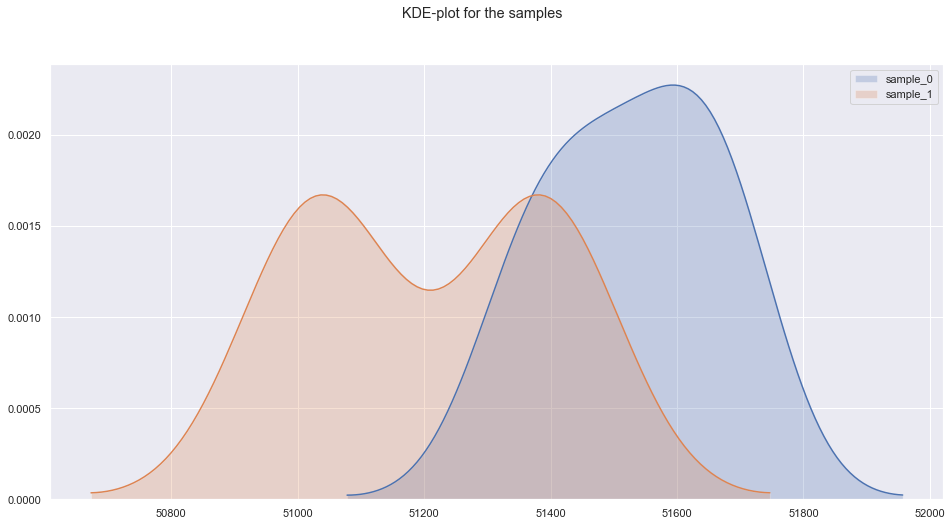

In [34]:
plt.figure(figsize=(16, 8))
plt.suptitle('KDE-plot for the samples')
legend = []

sns.kdeplot(sample_0, shade=True)
legend.append('sample_0')

sns.kdeplot(sample_1, shade=True)
legend.append('sample_1')

plt.legend(legend)
plt.show()

Распределения выглядят как нормальные, но мы понимаем, что это - очень и очень условно. Вся надежда - на устойчивость предстоящих тестов к отклонениям от нормальности и на их способность адекватно работать со сверхмалыми выборками.

## Проверка гипотезы

Проверять гипотезу о равенстве средних двух генеральных совокупностей будем при помощи критерия Стьюдента (выполним Т-тест Стьюдента).

Т-тест Стьюдента предназначен для работы с нормальными распределениями. Не обязательно распределения при этом должны быть идеальными: тест достаточно устойчив к отклонениям от нормальности (в разумных пределах). Для проверки распределений на нормальность выполним тест Шапиро-Уилка. Точнее, проверим лишь одно распределение, так как число наблюдений в выборке должно быть не менее трёх. Нулевая гипотеза: распределение является нормальным.

In [35]:
pvalue_comparison(st.shapiro(sample_0))

alpha:   0.050
p-value: 0.296
Zero hypothesis is not rejected


Результат не противоречит нулевой гипотезе - распределение можно считать нормальным.

Необходимо также понять, равны ли дисперсии двух выборок. Для этого выполним тест Ливиня. Нулевая гипотеза: дисперсии обеих генеральных совокупностей, из которых взяты выборки (и, следовательно, дисперсии самих выборок), равны между собой.

In [36]:
pvalue_comparison(st.levene(sample_0, sample_1))

alpha:   0.050
p-value: 0.193
Zero hypothesis is not rejected


Результат не противоречит нулевой гипотезе - дисперсии обеих выборок, возможно, равны между собой. Это было бы вполне закономерно, так как обе выборки взяты из одного и того же массива.

Выполним Т-тест Стьюдента.

In [37]:
pvalue_comparison(st.ttest_ind(sample_0, sample_1, equal_var=True))

alpha:   0.050
p-value: 0.035
Zero hypothesis is rejected


*P-value* получился меньше уровня значимости.

Результат противоречит нулевой гипотезе, и мы её отвергаем. Принимаем альтернативную:
* Среднее количество проданных билетов за неделю, на которой есть фестиваль, **не равно** количеству проданных билетов за неделю, на которой нет фестиваля.

На графике видно, что если фестиваль - **есть**, то билетов продаётся **меньше**.

## Проверка гипотезы. Дополнительный тест

Выборка *sample_1* содержит всего два наблюдения. Это значит, что не вполне коррекно говорить о том, к какому виду относится её распределение.

Попробуем рассмотреть выборку *sample_1* как число - возьмём среднее по ней. И проверим гипотезу о равенстве среднего генеральной совокупности некоторому значению.

Найдём среднее выборки *sample_1*.

In [38]:
sample_1_mean = sample_1.mean()
sample_1_mean

51210.0

Построим KDE-график выборки *sample_0* и нанесём на него *sample_1_mean*.

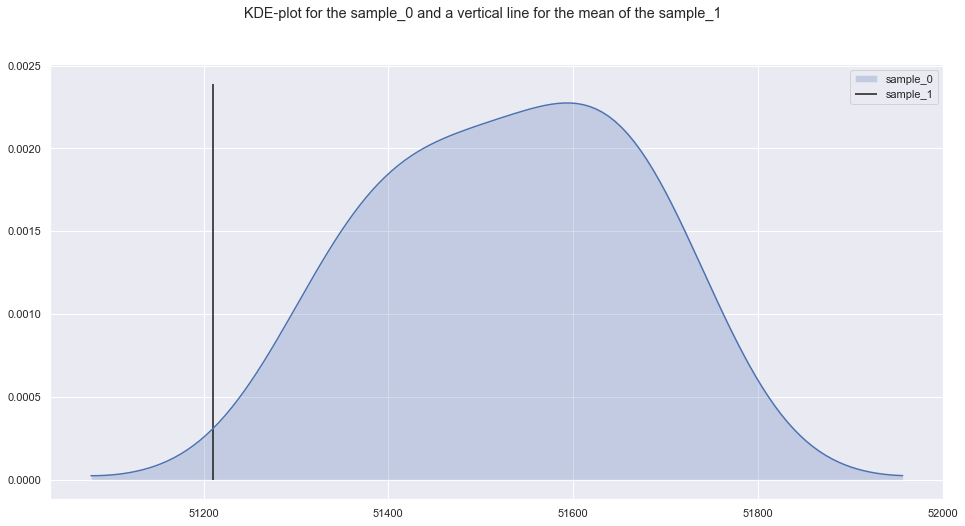

In [39]:
plt.figure(figsize=(16, 8))
plt.suptitle('KDE-plot for the sample_0 and a vertical line for the mean of the sample_1')
legend = []

ax_0 = sns.kdeplot(sample_0, shade=True)
legend.append('sample_0')

plt.vlines(sample_1_mean, ymin=0, ymax=ax_0.viewLim.y1)
legend.append('sample_1')

plt.legend(legend)
plt.show()

Среднее *sample_1* (*sample_1_mean*) на этом графике соответствует "седловине" *sample_1* на предыдущем графике. Всё логично и предсказуемо.

О выборке *sample_0* нам уже всё известно из предыдущего подраздела, поэтому можно сразу переходить к проверке гипотезы.

Выполним Т-тест Стьюдента.

In [40]:
pvalue_comparison(st.ttest_1samp(sample_0, sample_1_mean))

alpha:   0.050
p-value: 0.001
Zero hypothesis is rejected


Поскольку *p-value* опять получился меньше уровня значимости, вывод будет точно такой же, как в предыдущем подразделе. Повторим его.

Результат противоречит нулевой гипотезе, и мы её отвергаем. Принимаем альтернативную:
* Среднее количество проданных билетов за неделю, на которой есть фестиваль, **не равно** количеству проданных билетов за неделю, на которой нет фестиваля.

На графике видно, что если фестиваль - **есть**, то билетов продаётся **меньше**.

## Оценка различия в количестве приобретаемых билетов

Оценим в первом приближении, насколько существенным является различие в количестве приобретаемых билетов за те недели, на которых есть фестивали, и за те, на которых фестивалей нет.

Расчёт выполним на основе средних двух выборок.

In [41]:
sample_0_mean = sample_0.mean()

d(sample_0_mean)
d(sample_1_mean)

51530.857142857145

51210.0

In [42]:
abs(sample_0_mean - sample_1_mean) / ((sample_0_mean + sample_1_mean) / 2)

0.0062459502826807374

Различие составляет примерно 0.6% от среднего количества приобретаемых билетов.

## Вывод по проверке гипотезы

На основании ТЗ сформулированы **нулевая** и **альтернативная** гипотезы. Задан **пороговый** уровень значимости *alpha* (*alpha* = 0.050), ниже которого нулевая гипотеза **отвергается**.

Сформированы две выборки. Главная их особенность - **крайне малый** размер: всего 7 наблюдений в одной и 2 - в другой. Выборки были визуализированы построением KDE-графика. Частотную гистограмму строить не имеет смысла при столь малом размере выборок.

Для **проверки** распределения на **нормальность** выполнен тест **Шапиро-Уилка**. Он выполнен только для одной выборки, поскольку число наблюдений в выборке должно быть не менее трёх. Результат теста **не противоречит** гипотезе о том, что распределение значений выборки - **нормальное**. Уровень значимости: *p-value* = 0.296.

Проверка, **равны** ли между собой **дисперсии** двух выборок, выполнена с помощью теста **Ливиня**. Результат теста **не противоречит** гипотезе о том, что дисперсии двух выборок **равны**. Уровень значимости: *p-value* = 0.193.

Для проверки **нулевой гипотезы** выполнен Т-тест **Стьюдента** для задачи о равенстве средних двух генеральных совокупностей (с учётом полученных выше результатов). Уровень значимости: *p-value* = 0.035, что **ниже** установленного порогового уровня значимости. На этом основании **нулевая** гипотеза **отвергнута**. Принята **альтернативная** гипотеза: среднее количество проданных билетов за неделю, на которой есть фестиваль, **не равно** количеству проданных билетов за неделю, на которой нет фестиваля.

Поскольку в одной из выборок имеется всего два наблюдения, для **повышения надёжности** расчёта выполнен **дополнительный** тест - Т-тест Стьюдента для задачи о равенстве среднего генеральной совокупности некоторому значению. Некоторое значение - это **среднее выборки**, т.е. среднее двух наблюдений. Уровень значимости: *p-value* = 0.001. Полученный результат **подтверждает** выводы, сделанные ранее: **нулевая** гипотеза **отвергается**, и вместо неё принимается **альтернативная** гипотеза.

На графиках видно, что если фестиваль - **есть**, то билетов продаётся **меньше**.

# Общий вывод

##### Предобработка данных

Данные изначально были в хорошем состоянии: отсутствуют дубликаты, пропуски (пропуски в таблице *fests* - не пропуски, так как под ними понималось значение "фестиваля нет").

Единственная аномалия - количество купленных за одну из недель билетов, сильно отличавшееся от количества за другие недели. Строка с аномалией удалена.

Удалён лишний столбец в таблице *fests*. Ещё один в ней же - преобразован в соответствии с задачами исследования.

##### Исследовательский анализ данных

Исследован топ-10 городов по количеству прибывающих рейсов. Первые места - у столиц, что ожидаемо: Москва, Санкт-Петербург, Новосибирск. Затем - другие крупные и экономически наиболее развитые города. В топ-10 прослеживается положительная связь между численностью населения и числом рейсов. Москва отличается в большую сторону в несколько раз от следующего за ней Санкт-Петербурга и по населению, и по числу рейсов, и по количеству аэропортов. Различия между другими городами из топ-10 - значительно меньше. 

По парку эксплуатируемых самолётов (а также по списку городов) видно, что компания летает по самым разным маршрутам: и по Северу, и между регионами, и через всю страну. Для этого у неё есть самолёты различных классов как по дальности полёта, так и по пассажировместимости. Есть даже маленькие самолёты *Cessna 208 Caravan*, которые оказались на первом месте по числу выполненных рейсов (28%). Значительная доля рейсов выполняется на *Bombardier CRJ-200* (27%) и *Sukhoi SuperJet-100* (26%) - второе и третье место. Остальные модели самолётов выполняют суммарно 19% рейсов, а каждая модель в отдельности - от 2 до 6%.

Видно, что компания больше сфокусирована на местных перевозках. Дальние маршруты тоже есть, но они не преобладают. Охватывает компания и весьма специфический сектор: населённые пункты на Севере.

На количество выполненных рейсов в остальные города (не входящие в топ-10) почти не оказывают влияние ни численность населения, ни статус населённого пункта, ни уровень экономического развития города или региона. Все города идут вперемешку: в северный посёлок могут в среднем летать столько же раз в день, сколько в облцентр. Отметить можно разве что города-миллионники: в целом они - наверху (в них летает больше рейсов).

При этом важно, что количество рейсов не говорит об объёме перевозок: самолёты на этих маршрутах могут сильно различаться по классу. Поэтому количество рейсов - вопрос, скорее, технический: если изменить расписание и тип воздушного судна, рейтинг изменится тоже.

##### Проверка гипотезы

Проверяемая гипотеза сводится к гипотезе о равенстве двух средних генеральных совокупностей.

Рассматриваемые выборки имеют сверхмалый размер: 7 и 2 наблюдения. Но, несмотря на это обстоятельство, все необходимые расчёты удалось выполнить успешно и получить вполне адекватные результаты.

При помощи теста Шапиро-Уилка не было опровергнуто (*p-value* = 0.296), что выборка, состоящая из 7 наблюдений, имеет нормальное распределение. В реальности набор из семи чисел вообще мало похож на какое-либо распределение, так как данных - слишком мало. Но, тем не менее, расчёт показал, что на такое допущение в данной ситуации пойти можно.

Выборки сформированы из одного массива данных, поэтому можно предположить равенство их дисперсий. Тест Ливиня не опроверг это предположение (*p-value* = 0.193).

Гипотеза проверялась при помощи Т-теста Стьюдента в двух вариантах постановки задачи: о равенстве средних двух генеральных совокупностей и о равенстве среднего генеральной совокупности некоторому значению (среднему выборки из двух наблюдений). Результаты: *p-value* = 0.035 и *p-value* = 0.001 соответственно. Нулевая гипотеза отвергнута и принята альтернативная: среднее количество проданных билетов за неделю, на которой есть фестиваль, не равно количеству проданных билетов за неделю, на которой нет фестиваля.

Таким образом, несмотря на то, что билетов продаётся, на первый взгляд, в любую неделю примерно одинаковое количество, оказалось, что это не так. Имеется хоть и небольшая, но статистически значимая разница (0.6%): в "фестивальные" недели билетов продаётся меньше, чем в другие.

Альтернативная гипотеза в формулировках ТЗ выглядит так: средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время в меньшую сторону.

##### Заключение

Авиакомпания *F9* представляется весьма серьёзным игроком на отечественном рынке авиаперевозок. Особенность компании - присутствие в сегменте легкомоторной авиации. Компания больше тяготеет к местным региональным перевозкам, нежели к дальнемагистральным.

Установлено, что спрос на авиабилеты снижается во время проведения фестивалей (примерно на 0.6%). На основании имеющихся данных можно предположить, что это происходит из-за того, что пассажиры воспринимают авиакомпанию *F9* как местного регионального перевозчика. На крупные фестивали гости едут со всей страны. И для того, чтобы добраться из её дальних уголков, скажем, в Москву или Санкт-Петербург, выбирают не "местного" перевозчика, а "федерального", "дальнемагистрального" и т.п.

Иными словами, причина может быть в позиционировании компании на рынке и её имидже. Несмотря на фактическое наличие у неё и дальних маршрутов тоже.

Вместе с тем, снижение спроса - небольшое (0.6%), что тоже говорит в пользу описанной выше причины. Выбор авиакомпании при покупке билета - это больше о рациональном: большинство пассажиров при бронировании уделяют внимание цифрам (стоимость, время вылета-прилёта, тип самолёта и т.п.). А имидж и бренд лежат, скорее, в эмоциональной плоскости.

Процент таких "эмоциональных" пассажиров, скорее всего, невелик.

Компании можно порекомендовать лишь принять полученную информацию к сведению и на основании установленных фактов продолжать исследовать рассматриваемый вопрос - снижение спроса во время фестивалей.